## Advanced Text Preprocessing

## Imports

In [20]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re

import spacy

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vanilla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
path= '/Users/vanilla/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1'
data = pd.read_csv(path+'/spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
print(data)

data['label'] = data['label'].map({'ham': 0, 'spam': 1})
X = data['message']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [17]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Add Stemming

In [9]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'\W', ' ', text)
    text = text.lower().split()
    # Stem and remove stopwords
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

# Applying the preprocessing
data['message'] = data['message'].apply(preprocess_text)

## Add Lemmatization (spaCy)

In [10]:
nlp = spacy.load('en_core_web_sm')

In [11]:
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

data['message'] = data['message'].apply(lemmatize_text)

## SVM Model

In [18]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vec, y_train)
svm_pred = svm_model.predict(X_test_vec)

# Model Performance Visualization

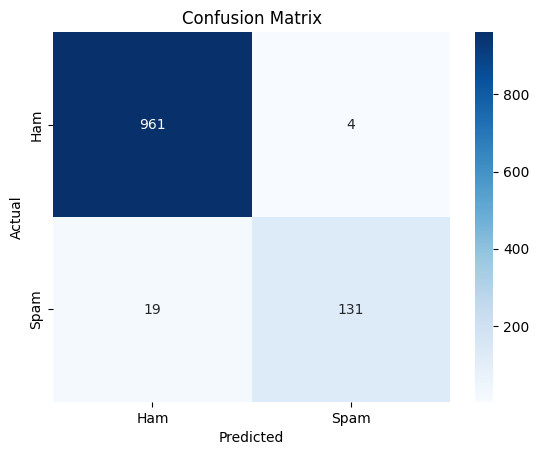

In [19]:
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Precision-recall curve

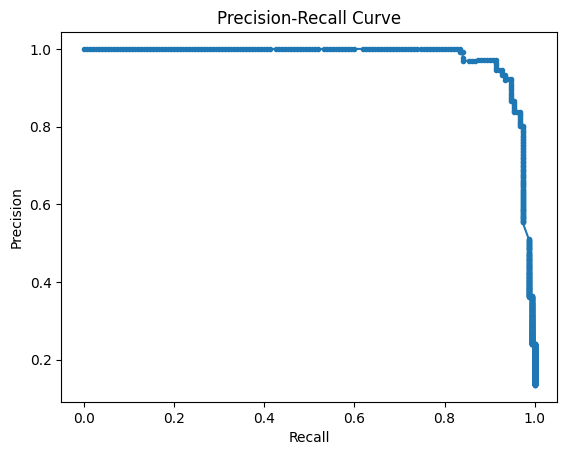

In [21]:
y_scores = svm_model.decision_function(X_test_vec)
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()